In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
# os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Dataset: UCI credit card default

In [2]:
import pandas as pd
credit = pd.read_csv('uci_credit_card.csv')
credit

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


# Neural Networks

## Dense layers

### The linear regression model

### A simple dense layer

In [3]:
# Define inputs (features)
inputs = tf.constant([[1, 35]], dtype='float32')
inputs

2023-02-03 00:55:52.398058: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[ 1., 35.]], dtype=float32)>

In [4]:
# Define weights
weights = tf.Variable([[-0.05], [-0.01]])
weights

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.05],
       [-0.01]], dtype=float32)>

In [5]:
# Define the bias
bias = tf.Variable([0.5])
bias

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.5], dtype=float32)>

In [6]:
# Multiply inputs (features) by the weights
product = tf.matmul(inputs, weights)
# Define dense layer
dense = tf.keras.activations.sigmoid(product+bias)
dense

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.5249792]], dtype=float32)>

### Defining a complete model

In [7]:
# Define input (features) layer
data=credit.iloc[:,1:-1].values
inputs = tf.constant(data, tf.float32)
# Define first dense layer
dense1 = tf.keras.layers.Dense(10, activation='sigmoid')
dense1

In [8]:
dense1 = dense1(inputs)
dense1

<tf.Tensor: shape=(30000, 10), dtype=float32, numpy=
array([[1., 1., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]], dtype=float32)>

In [9]:
# Define second dense layer
dense2 = tf.keras.layers.Dense(5, activation='sigmoid')
dense2

In [10]:
dense2 = dense2(dense1)
dense2

<tf.Tensor: shape=(30000, 5), dtype=float32, numpy=
array([[0.49385005, 0.30658865, 0.14536503, 0.42213428, 0.23339957],
       [0.49385005, 0.30658865, 0.14536503, 0.42213428, 0.23339957],
       [0.38051793, 0.3946194 , 0.20912471, 0.5070648 , 0.3345345 ],
       ...,
       [0.25983927, 0.4089863 , 0.18776475, 0.4956566 , 0.3022782 ],
       [0.49385005, 0.30658865, 0.14536503, 0.42213428, 0.23339957],
       [0.44987175, 0.32439822, 0.18925014, 0.43251112, 0.42675564]],
      dtype=float32)>

In [11]:
# Define output (predictions) layer
outputs = tf.keras.layers.Dense(1, activation='sigmoid')
outputs

In [12]:
outputs = outputs(dense2)
outputs

<tf.Tensor: shape=(30000, 1), dtype=float32, numpy=
array([[0.3905689 ],
       [0.3905689 ],
       [0.38115737],
       ...,
       [0.39609477],
       [0.3905689 ],
       [0.3608697 ]], dtype=float32)>

### High-level versus low-level approach
* High-level approach
    * High-level API operations  
    `dense = keras.layers.Dense(10, activation='sigmoid')`
* Low-level approach
    * Linear-algebraic operations  
    `prod = matmul(inputs, weights)`  
    `dense = keras.activations.sigmoid(prod)`

### The linear algebra of dense layers

In [13]:
borrower_features = tf.constant(credit[['EDUCATION', 'MARRIAGE', 'AGE']].values, dtype='float32')
borrower_features

<tf.Tensor: shape=(30000, 3), dtype=float32, numpy=
array([[ 2.,  1., 24.],
       [ 2.,  2., 26.],
       [ 2.,  2., 34.],
       ...,
       [ 2.,  2., 37.],
       [ 3.,  1., 41.],
       [ 2.,  1., 46.]], dtype=float32)>

In [14]:
# Initialize bias1
bias1 = tf.Variable([1.0])
bias1

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.], dtype=float32)>

In [15]:
# Initialize weights1 as 3x2 variable of ones
weights1 = tf.Variable(tf.ones((3, 2)), dtype='float32')
weights1

<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

In [16]:
# Perform matrix multiplication of borrower_features and weights1
product1 = tf.matmul(borrower_features, weights1)
# Apply sigmoid activation function to product1 + bias1
dense1 = tf.keras.activations.sigmoid(product1 + bias1)
# Print shape of dense1
print("\n dense1's output shape: {}".format(dense1.shape))


 dense1's output shape: (30000, 2)


In [17]:
# Initialize bias2 and weights2
bias2 = tf.Variable(1.0)
weights2 = tf.Variable(tf.ones((2, 1)))

# Perform matrix multiplication of dense1 and weights2
product2 = tf.matmul(dense1, weights2)
product2

<tf.Tensor: shape=(30000, 1), dtype=float32, numpy=
array([[2.],
       [2.],
       [2.],
       ...,
       [2.],
       [2.],
       [2.]], dtype=float32)>

In [18]:
# Apply activation to product2 + bias2 and print the prediction
prediction = tf.keras.activations.sigmoid(product2 + bias2)
print('\n prediction: {}'.format(prediction.numpy()[0,0]))
print('\n actual: 1')


 prediction: 0.9525741338729858

 actual: 1


### Exercises

#### The low-level approach with multiple examples

In [19]:
borrower_features = tf.constant(credit[['EDUCATION', 'MARRIAGE', 'AGE']].values, dtype='float32')

bias1 = tf.Variable([0.1])

weights1 = tf.Variable([[-0.6, 0.6],
                        [0.8, -0.3],
                        [-0.09, -0.08]], dtype='float32')

# Compute the product of borrower_features and weights1
products1 = tf.matmul(borrower_features, weights1)

# Apply a sigmoid activation function to products1 + bias1
dense1 = tf.keras.activations.sigmoid(products1 + bias1)

# Print the shapes of borrower_features, weights1, bias1, and dense1
print('\n shape of borrower_features: ', borrower_features.shape)
print('\n shape of weights1: ', weights1.shape)
print('\n shape of bias1: ', bias1.shape)
print('\n shape of dense1: ', dense1.shape)


 shape of borrower_features:  (30000, 3)

 shape of weights1:  (3, 2)

 shape of bias1:  (1,)

 shape of dense1:  (30000, 2)


#### Using the dense layer operation

In [20]:
borrower_features = tf.constant(credit.iloc[:, 1:11].values, dtype='float32')

# Define the first dense layer
dense1 = tf.keras.layers.Dense(7, activation='sigmoid')(borrower_features)

# Define a dense layer with 3 output nodes
dense2 = tf.keras.layers.Dense(3, activation='sigmoid')(dense1)

# Define a dense layer with 1 output node
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(dense2)

# Print the shapes of dense1, dense2, and predictions
print('\n shape of dense1: ', dense1.shape)
print('\n shape of dense2: ', dense2.shape)
print('\n shape of predictions: ', predictions.shape)


 shape of dense1:  (30000, 7)

 shape of dense2:  (30000, 3)

 shape of predictions:  (30000, 1)


##  Activation functions

### What is an activation function?
* Components of a typical hidden layer
    * Linear: Matrix multiplication
    * Nonlinear: Activation function

### Why nonlinearities are important?

Consider a simple model using the credit card data. The features are borrower age and credit card bill amount. The target variable is default. 

We can see that bill amount usually increases early in life and decreases later in life. This suggests that a high bill for young and older borrowers may mean something different for default.

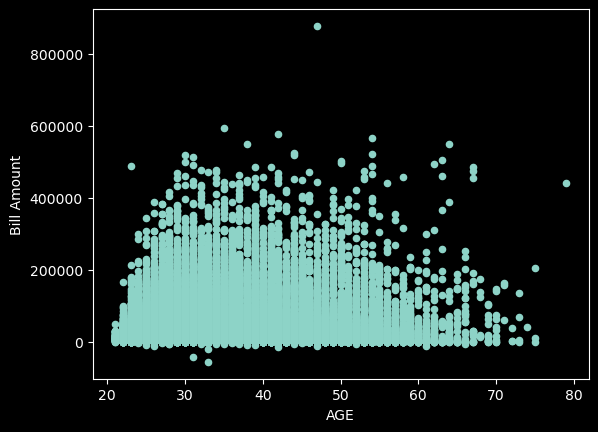

In [21]:
age_bill = credit[['AGE']]\
    .join(credit.loc[:, credit.columns.str.contains('BILL_AMT')].mean(axis=1).rename('Bill Amount'))
_ = age_bill.plot.scatter(x='AGE', y='Bill Amount')

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'Bill Amount'}>]], dtype=object)

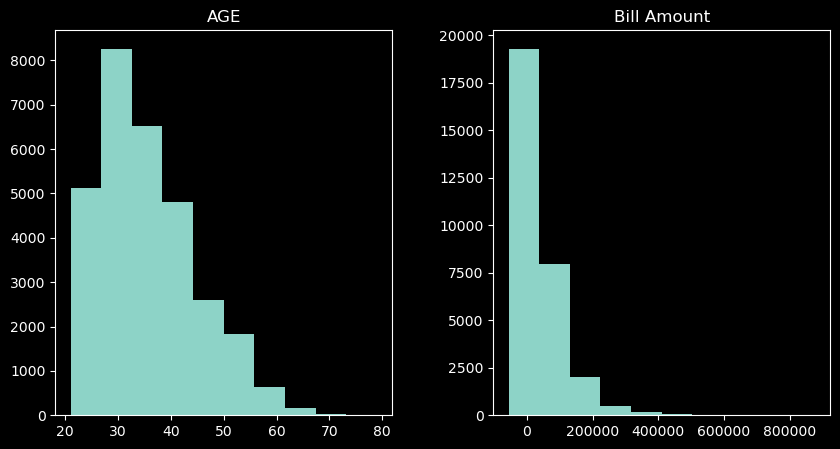

In [22]:
age_bill.hist(figsize=(10,5), grid=False)

### A simple example

Let's look at a simple example, where we assume that the weight on age is 1 and the weight on the bill amount is 2. Note that ages are divided by 100 and the bill's amount is divided by 10000.

We then perform the matrix multiplication step for all combinations of features: young with a high bill, young with a low bill, old with a high bill, and old with a low bill. 

In [23]:
# Define example borrower features
young, old = 0.3, 0.6
# Define example coefficients
low_bill, high_bill = 0.1, 0.5
# Apply matrix multiplication step for all feature combinations
young_high = 1.0*young + 2.0*high_bill
young_low = 1.0*young + 2.0*low_bill
old_high = 1.0*old + 2.0*high_bill
old_low = 1.0*old + 2.0*low_bill

In [24]:
print('Young high and low:', young_high, young_low)
print('Old high and low  :', old_high, old_low)

Young high and low: 1.3 0.5
Old high and low  : 1.6 0.8


If we don't apply an activation function and we assume the bias is zero, we find that the impact of bill size on default does not depend on age. In both cases, we predict a value of 0 point 8.

Note that our target is a binary variable that is equal to 1 when the borrower defaults; however, predictions will be real numbers between 0 and 1, where values over 0 point 5 will be treated as predicting default.

In [25]:
# Difference in default predictions for young
print(young_high - young_low)
# Difference in default predictions for old
print(old_high - old_low)

0.8
0.8


But what if we apply a sigmoid activation function?

The impact of bill amount on default now depends on the borrower's age.

In [26]:
print('Young high and low:', tf.keras.activations.sigmoid(young_high).numpy(), tf.keras.activations.sigmoid(young_low).numpy())
print('Old high and low  :', tf.keras.activations.sigmoid(old_high).numpy(), tf.keras.activations.sigmoid(old_low).numpy())

Young high and low: 0.785835 0.62245935
Old high and low  : 0.8320184 0.6899745


In particular, we can see that the change in the predicted value for default is larger for young borrowers than it is for old borrowers. 

In [27]:
# Difference in default predictions for young
print(tf.keras.activations.sigmoid(young_high).numpy() -
tf.keras.activations.sigmoid(young_low).numpy())
# Difference in default predictions for old
print(tf.keras.activations.sigmoid(old_high).numpy() -
tf.keras.activations.sigmoid(old_low).numpy())

0.16337568
0.14204389


### The sigmoid activation function

The sigmoid activation function is used primarily in the output layer of binary classification problems. When we use the low-level approach, we'll pass the sum of the product of weights and inputs into tf dot keras dot activations dot sigmoid. When we use the high-level approach, we'll simply pass sigmoid as a parameter to a keras dense layer.

* Sigmoid activation function
    * Binary classification
    * Low-level: `tf.keras.activations.sigmoid()`
    * High-level: `sigmoid`

### The relu activation function

We'll typically use the rectified linear unit or relu activation in all layers other than the output layer. This activation simply takes the maximum of the value passed to it and 0.

* ReLu activation function
    * Hidden layers
    * Low-level: `tf.keras.activations.relu()`
    * High-level: `relu`

### The softmax activation function

The softmax activation function is used in the output layer in classification problems with more than two classes. The outputs from a softmax activation function can be interpreted as predicted class probabilities in multiclass classification problems.

* Softmax activation function
    * Output layer (>2 classes)
    * Low-level: `tf.keras.activations.softmax()`
    * High-level: `softmax`

### Activation functions in neural networks

In [28]:
# Define input layer
inputs = tf.constant(borrower_features, tf.float32)
# Define dense layer 1
dense1 = tf.keras.layers.Dense(16, activation='relu')(inputs)
# Define dense layer 2
dense2 = tf.keras.layers.Dense(8, activation='sigmoid')(dense1)
# Define output layer
outputs = tf.keras.layers.Dense(4, activation='softmax')(dense2)
outputs

<tf.Tensor: shape=(30000, 4), dtype=float32, numpy=
array([[0.11397551, 0.10099815, 0.35263735, 0.43238902],
       [0.11397551, 0.10099815, 0.35263735, 0.43238902],
       [0.11397551, 0.10099815, 0.35263735, 0.43238902],
       ...,
       [0.11397551, 0.10099815, 0.35263735, 0.43238902],
       [0.11397551, 0.10099815, 0.35263735, 0.43238902],
       [0.11397551, 0.10099815, 0.35263735, 0.43238902]], dtype=float32)>

### Exercises

#### Binary classification problems

In [29]:
default = credit[['default.payment.next.month']].values
bill_amounts = credit[credit.columns[credit.columns.str.contains(r'BILL_AMT[123]', regex=True)]].values

# Construct input layer from features
inputs = tf.constant(bill_amounts, dtype='float32')

# Define first dense layer
dense1 = tf.keras.layers.Dense(6, activation='relu')(inputs)

# Define second dense layer
dense2 = tf.keras.layers.Dense(2, activation='relu')(dense1)

# Define output layer
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense2)

print(outputs)

# Print error for first five examples
error = default[:5] - outputs.numpy()[:5]
print(error)

tf.Tensor(
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]], shape=(30000, 1), dtype=float32)
[[1.]
 [1.]
 [0.]
 [0.]
 [0.]]


If you run the code several times, you'll notice that the errors change each time.

**This is because you're using an untrained model with randomly initialized parameters.**

Furthermore, the errors fall on the interval between -1 and 1 because default is a binary variable that takes on values of 0 and 1 and outputs is a probability between 0 and 1.

#### Multiclass classification problems

In [30]:
borrower_features = tf.constant(credit.iloc[:, 1:11].values, dtype='float32')

# Construct input layer from borrower features
inputs = tf.constant(borrower_features, dtype='float32')

# Define first dense layer
dense1 = tf.keras.layers.Dense(10, activation='sigmoid')(inputs)  # shouldn't be relu?

# Define second dense layer
dense2 = tf.keras.layers.Dense(8, activation='relu')(dense1)

# Define output layer
outputs = tf.keras.layers.Dense(len(credit.EDUCATION.unique()), activation='softmax')(dense2)

# Print first five predictions
print(outputs.numpy()[:5])

[[0.36818108 0.01896472 0.39990318 0.02354562 0.03773895 0.03561711
  0.11604937]
 [0.36818108 0.01896472 0.39990318 0.02354562 0.03773895 0.03561711
  0.11604937]
 [0.36818108 0.01896472 0.39990318 0.02354562 0.03773895 0.03561711
  0.11604937]
 [0.36818108 0.01896472 0.39990318 0.02354562 0.03773895 0.03561711
  0.11604937]
 [0.36818108 0.01896472 0.39990318 0.02354562 0.03773895 0.03561711
  0.11604937]]


Notice that each row of outputs sums to (almost) one.  This is because a row contains the predicted class probabilities for one example. 

In [31]:
outputs.numpy().sum(axis=1)

array([1.0000001, 1.0000001, 1.0000001, ..., 1.0000001, 1.0000001,
       1.0000001], dtype=float32)

## Optimizers

### How to find a minimum

### The gradient descent optimizer
* Stochastic gradient descent (SGD) optimizer
    * `tf.keras.optimizers.SGD()`
    * `learning_rate`
* Simple and easy to interpret

### The RMS prop optimizer
* Root mean squared (RMS) propagation optimizer
    * Applies different learning rates to each fature
    * `tf.keras.optimizers.RMSprop()`
    * `learning_rate`
    * `momentum`
    * `decay`
* Allows for momentum to both build and decay
* Setting a low value for the decay parameter will prevent momentum from accumulating over long periods during the training process.

### The adam optimizer
* Adaptive moment (adam) optimizer
    * `tf.keras.optimizers.Adam()`
    * `learning_rate`
    * `beta1`
* Perrforms well with default parameter values
*  Similar to RMS propagation optimizer, you can set the momentum to decay faster by lowering the beta1 parameter. Relative to RMS propagation optimizer, the adam optimizer will tend to perform better with the default parameter values, which we will typically use.

### A complete example

In [32]:
default = credit[['default.payment.next.month']].values
default

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [33]:
borrower_features = tf.constant(credit.iloc[:, 1:11].values, dtype='float32')
borrower_features

<tf.Tensor: shape=(30000, 10), dtype=float32, numpy=
array([[ 2.0e+04,  2.0e+00,  2.0e+00, ..., -1.0e+00, -1.0e+00, -2.0e+00],
       [ 1.2e+05,  2.0e+00,  2.0e+00, ...,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 9.0e+04,  2.0e+00,  2.0e+00, ...,  0.0e+00,  0.0e+00,  0.0e+00],
       ...,
       [ 3.0e+04,  1.0e+00,  2.0e+00, ...,  2.0e+00, -1.0e+00,  0.0e+00],
       [ 8.0e+04,  1.0e+00,  3.0e+00, ...,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 5.0e+04,  1.0e+00,  2.0e+00, ...,  0.0e+00,  0.0e+00,  0.0e+00]],
      dtype=float32)>

In [34]:
bias = tf.Variable([1], dtype='float32')
bias

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.], dtype=float32)>

In [35]:
weights = tf.Variable(tf.random.normal([10, 1]))
weights

<tf.Variable 'Variable:0' shape=(10, 1) dtype=float32, numpy=
array([[-0.21526305],
       [ 0.08934043],
       [ 0.24098487],
       [-1.8267981 ],
       [-0.4796724 ],
       [-0.27811703],
       [-1.433218  ],
       [ 1.2536969 ],
       [ 0.30186906],
       [-0.488701  ]], dtype=float32)>

In [36]:
# Define the model function
def model(bias, weights, features = borrower_features):
    product = tf.matmul(features, weights)
    return tf.keras.activations.sigmoid(product+bias)

# Compute the predicted values and loss
def loss_function(bias, weights, targets = default, features = borrower_features):
    predictions = model(bias, weights)
    return tf.keras.losses.binary_crossentropy(targets, predictions)

# Minimize the loss function with RMS propagation
opt = tf.keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.9)
opt.minimize(lambda: loss_function(bias, weights, default, borrower_features), var_list=[bias, weights])

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

In [37]:
bias

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.0316228], dtype=float32)>

In [38]:
weights

<tf.Variable 'Variable:0' shape=(10, 1) dtype=float32, numpy=
array([[-0.18364029],
       [ 0.1209632 ],
       [ 0.27260765],
       [-1.7951753 ],
       [-0.44804963],
       [-0.24649426],
       [-1.4015952 ],
       [ 1.2853197 ],
       [ 0.33349183],
       [-0.45707822]], dtype=float32)>

### Exercises

#### The dangers of local minima (confuse!)

Notice that we used the same optimizer and loss function, but two different initial values. When we started at 6.0 with x_1, we found the global minimum at 6.027515. When we started at 0.3, we stopped around 0.25 with x_2, the local minimum.

In [39]:
import math
def loss_function(x):
	return 4.0*math.cos(x-1) + tf.divide(math.cos(2.0*math.pi*x),x)

# Initialize x_1 and x_2
x_1 = tf.Variable(6.0, tf.float32)
x_2 = tf.Variable(0.3, tf.float32)

# Define the optimization operation
opt = tf.keras.optimizers.SGD(learning_rate=0.01)

for j in range(100):
	# Perform minimization using the loss function and x_1
    opt.minimize(lambda: loss_function(x_1), var_list=[x_1])
    # Perform minimization using the loss function and x_2
    opt.minimize(lambda: loss_function(x_2), var_list=[x_2])
    # Print x_1 and x_2 as numpy arrays
    print(x_1.numpy(), x_2.numpy())

6.000278 0.2656648
6.0005555 0.2517417
6.000833 0.25001493
6.0011106 0.24999991
6.001388 0.25
6.0016656 0.25
6.001943 0.25
6.0022206 0.25
6.002498 0.25
6.0027757 0.25
6.003053 0.25
6.0033307 0.25
6.003608 0.25
6.0038857 0.25
6.0041633 0.25
6.004441 0.25
6.004718 0.25
6.004995 0.25
6.005272 0.25
6.005549 0.25
6.005826 0.25
6.006103 0.25
6.00638 0.25
6.006657 0.25
6.006934 0.25
6.007211 0.25
6.0074883 0.25
6.007765 0.25
6.0080414 0.25
6.008318 0.25
6.0085945 0.25
6.008871 0.25
6.0091476 0.25
6.009424 0.25
6.009701 0.25
6.0099773 0.25
6.0102534 0.25
6.0105295 0.25
6.0108056 0.25
6.0110817 0.25
6.011358 0.25
6.011634 0.25
6.01191 0.25
6.012186 0.25
6.0124617 0.25
6.0127373 0.25
6.013013 0.25
6.0132885 0.25
6.013564 0.25
6.0138397 0.25
6.0141153 0.25
6.014391 0.25
6.014666 0.25
6.014941 0.25
6.0152164 0.25
6.0154915 0.25
6.0157666 0.25
6.0160418 0.25
6.0163164 0.25
6.016591 0.25
6.0168657 0.25
6.0171404 0.25
6.017415 0.25
6.0176897 0.25
6.0179644 0.25
6.0182385 0.25
6.0185127 0.25
6.018787 

##### Avoiding local minima

The previous problem showed how easy it is to get stuck in local minima. We had a simple optimization problem in one variable and gradient descent still failed to deliver the global minimum when we had to travel through local minima first. One way to avoid this problem is to use momentum, which allows the optimizer to break through local minima.

Several optimizers in tensorflow have a momentum parameter, including SGD and RMSprop. You will make use of RMSprop in this exercise. Note that x_1 and x_2 have been initialized to the same value this time. 

In [40]:
# Initialize x_1 and x_2
x_1 = tf.Variable(0.05, tf.float32)
x_2 = tf.Variable(0.05, tf.float32)

# Define the optimization operation for opt_1 and opt_2
opt_1 = tf.keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.99)
opt_2 = tf.keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.0)

for j in range(100):
    opt_1.minimize(lambda: loss_function(x_1), var_list=[x_1])
    # Define the minimization operation for opt_2
    opt_2.minimize(lambda: loss_function(x_2), var_list=[x_2])
    # Print x_1 and x_2 as numpy arrays
    print(x_1.numpy(), x_2.numpy())

0.08162277 0.08162277
0.12370357 0.09239703
0.16937593 0.10061011
0.21612528 0.10748637
0.26283938 0.11351728
0.3089688 0.11895749
0.35423416 0.12395829
0.3985036 0.12861769
0.44173357 0.13300318
0.48393637 0.13716331
0.52516055 0.14113423
0.565478 0.14494357
0.60497516 0.14861287
0.6437461 0.15215927
0.68188775 0.15559654
0.71949583 0.15893586
0.7566618 0.1621864
0.79346985 0.16535574
0.8299954 0.16845016
0.86630285 0.17147484
0.9024445 0.17443411
0.9384595 0.17733152
0.9743735 0.18017003
1.0101985 0.18295202
1.0459329 0.18567942
1.0815629 0.18835376
1.1170632 0.1909762
1.1523991 0.19354758
1.187528 0.19606848
1.2224023 0.19853921
1.2569712 0.20095988
1.2911835 0.20333037
1.3249896 0.2056504
1.3583438 0.20791954
1.3912065 0.21013717
1.4235448 0.2123026
1.4553342 0.21441497
1.4865594 0.21647336
1.5172143 0.21847674
1.5473021 0.22042404
1.5768352 0.22231409
1.6058341 0.22414573
1.6343275 0.22591771
1.6623507 0.22762884
1.689945 0.2292779
1.7171565 0.23086368
1.7440354 0.23238505
1.77063

Notice that opt_1 built momentum, bringing x_1 closer to the global minimum. To the contrary, opt_2, which had a momentum parameter of 0.0, got stuck in the local minimum.

## Training a network in Tensorflow

### Random initializers
* Often need to initialize thousands of variables
    * `tf.ones()` may perform poorly
    * Tedious and difficult to initialize variables individually
* Alternatively, draw initial values from distribution
    * `Normal`
    * `Uniform`
    * `Glorot` initializer

### Initializing variables in TensorFlow

In [41]:
# Define 500x500 random normal variable
weights = tf.Variable(tf.random.normal([500, 500], seed=1))
weights

<tf.Variable 'Variable:0' shape=(500, 500) dtype=float32, numpy=
array([[-0.8113182 ,  1.4845988 ,  0.06532937, ...,  1.3535147 ,
         0.05761741, -0.8454021 ],
       [-0.85459584, -1.718887  ,  1.2649354 , ..., -1.487472  ,
         1.2056005 , -1.416987  ],
       [-0.75563353, -1.0772663 ,  0.34951594, ...,  0.7500002 ,
        -1.1421514 , -1.4180522 ],
       ...,
       [-1.8275657 ,  1.5023036 ,  0.04237651, ...,  1.280315  ,
        -1.6652114 ,  1.7865646 ],
       [-0.03093798, -1.1143426 ,  0.44247365, ...,  0.90157366,
         0.92424047,  0.08544604],
       [ 0.2325353 , -0.4583389 ,  0.29482397, ...,  0.85037494,
        -0.61481994, -0.97650796]], dtype=float32)>

Alternatively, we could use the truncated random normal distribution, which discards very large and very small draws.

The values are drawn from a normal distribution with specified mean and standard deviation, discarding and re-drawing any samples that are more than two standard deviations from the mean.

In [42]:
# Define 500x500 truncated random normal variable
weights = tf.Variable(tf.random.truncated_normal([500, 500], seed=1))
weights

<tf.Variable 'Variable:0' shape=(500, 500) dtype=float32, numpy=
array([[-0.8113182 ,  1.4845988 ,  0.06532937, ...,  0.26607603,
        -1.1521063 ,  0.65844756],
       [ 0.00534202, -1.0460438 , -1.6427648 , ...,  0.4255401 ,
        -0.7020646 , -0.02812   ],
       [-0.10106638,  0.46920854, -1.0703483 , ...,  0.69410753,
        -1.1040059 , -0.92811704],
       ...,
       [ 0.73306364,  0.8298194 ,  0.16535152, ...,  1.1693199 ,
        -1.4613376 ,  0.3995474 ],
       [ 1.40874   ,  0.35279596,  0.2599991 , ...,  0.05891023,
        -0.2668419 , -1.1651356 ],
       [ 0.11793835,  0.45683753, -0.01006938, ..., -1.9923282 ,
         1.233091  , -0.66922677]], dtype=float32)>

We can also use the high-level approach by initializing a dense layer using the default keras option, currently the `'glorot_uniform'` initializer.

In [43]:
# Define a dense layer with the default initializer
dense = tf.keras.layers.Dense(32, activation='relu')

If we instead wish to initialize values to zero, we can do this using the kernel initializer parameter.

In [44]:
# Define a dense layer with the zeros initializer
dense = tf.keras.layers.Dense(32, activation='relu',
                              kernel_initializer='zeros')

### Neural networks and overfitting

### Applying dropout

A simple solution to the overfitting problem is to use dropout, an operation that will randomly drop the weights connected to certain nodes in a layer during the training process. This will force your network to develop more robust rules for classification, since it cannot rely on any particular nodes being passed to an activation function. This will tend to improve out-of-sample performance. 

### Implementing dropout in a network

We then pass the input layer to a dense layer, which has 32 nodes and uses a relu activation function. 

In [45]:
# Define input data
inputs = np.array(borrower_features, np.float32)
# Define dense layer 1
dense1 = tf.keras.layers.Dense(32, activation='relu')(inputs)
dense1

<tf.Tensor: shape=(30000, 32), dtype=float32, numpy=
array([[ 6275.2266,     0.    ,     0.    , ...,  3331.2205,  1222.7361,
            0.    ],
       [37666.824 ,     0.    ,     0.    , ..., 19981.797 ,  7352.1313,
            0.    ],
       [28248.414 ,     0.    ,     0.    , ..., 14986.199 ,  5512.2188,
            0.    ],
       ...,
       [ 9412.353 ,     0.    ,     0.    , ...,  4997.448 ,  1831.609 ,
            0.    ],
       [25108.22  ,     0.    ,     0.    , ..., 13320.705 ,  4898.119 ,
            0.    ],
       [15689.846 ,     0.    ,     0.    , ...,  8324.676 ,  3057.8914,
            0.    ]], dtype=float32)>

We'll next pass the first dense layer to a second layer, which reduces the number of output nodes to 16.

In [46]:
# Define dense layer 2
dense2 = tf.keras.layers.Dense(16, activation='relu')(dense1)
dense2

<tf.Tensor: shape=(30000, 16), dtype=float32, numpy=
array([[    0.    ,  2717.7083,     0.    , ...,   942.2713,     0.    ,
         9054.275 ],
       [    0.    , 16306.292 ,     0.    , ...,  5627.471 ,     0.    ,
        54306.88  ],
       [    0.    , 12230.002 ,     0.    , ...,  4223.4814,     0.    ,
        40731.73  ],
       ...,
       [    0.    ,  4076.1985,     0.    , ...,  1414.3334,     0.    ,
        13579.784 ],
       [    0.    , 10871.303 ,     0.    , ...,  3756.3625,     0.    ,
        36207.57  ],
       [    0.    ,  6794.0435,     0.    , ...,  2351.5996,     0.    ,
        22630.791 ]], dtype=float32)>

Before passing those nodes to the output layer, we'll apply a dropout layer. The only argument specifies that we want to drop the weights connected to 25% of nodes randomly.

In [47]:
# Apply dropout operation
dropout1 = tf.keras.layers.Dropout(0.25)(dense2)
dropout1

<tf.Tensor: shape=(30000, 16), dtype=float32, numpy=
array([[    0.    ,  2717.7083,     0.    , ...,   942.2713,     0.    ,
         9054.275 ],
       [    0.    , 16306.292 ,     0.    , ...,  5627.471 ,     0.    ,
        54306.88  ],
       [    0.    , 12230.002 ,     0.    , ...,  4223.4814,     0.    ,
        40731.73  ],
       ...,
       [    0.    ,  4076.1985,     0.    , ...,  1414.3334,     0.    ,
        13579.784 ],
       [    0.    , 10871.303 ,     0.    , ...,  3756.3625,     0.    ,
        36207.57  ],
       [    0.    ,  6794.0435,     0.    , ...,  2351.5996,     0.    ,
        22630.791 ]], dtype=float32)>

We'll then pass this to the output layer, which reduces the 16 nodes to 1 and applies a sigmoid activation function. 

In [48]:
# Define output layer
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dropout1)
outputs

<tf.Tensor: shape=(30000, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)>

### Exercises

#### Initialization in TensorFlow

A good initialization can reduce the amount of time needed to find the global minimum. In this exercise, we will initialize weights and biases for a neural network that will be used to predict credit card default decisions. To build intuition, we will use the low-level, linear algebraic approach, rather than making use of convenience functions and high-level keras operations. We will also expand the set of input features from 3 to 23.

In [49]:
# Define the layer 1 weights
w1 = tf.Variable(tf.random.normal([23, 7]))

# Initialize the layer 1 bias
b1 = tf.Variable(tf.ones([7]))

# Define the layer 2 weights
w2 = tf.Variable(tf.random.normal([7, 1]))

# Define the layer 2 bias
b2 = tf.Variable([0.0])

#### Defining the model and loss function

In this exercise, you will train a neural network to predict whether a credit card holder will default. You defined the weights and biases in the previous exercise.

Note that the predictions layer is defined as $\sigma(layer1*w2+b2)$, where $\sigma$ is the sigmoid activation, $layer1$ is a tensor of nodes for the first hidden dense layer, $w2$ is a tensor of weights, and $b2$ is the bias tensor.

The trainable variables are $w1$, $b1$, $w2$, and $b2$.

In [50]:
# Define the model
def model(w1, b1, w2, b2, features):
	# Apply relu activation functions to layer 1
	layer1 = tf.keras.activations.relu(tf.matmul(features, w1) + b1)
    # Apply dropout rate of 0.25
	dropout = tf.keras.layers.Dropout(0.25)(layer1)
	return tf.keras.activations.sigmoid(tf.matmul(dropout, w2) + b2)

# Define the loss function
def loss_function(w1, b1, w2, b2, features, targets):
	predictions = model(w1, b1, w2, b2, features)
	# Pass targets and predictions to the cross entropy loss
	return tf.keras.losses.binary_crossentropy(targets, predictions)

One of the benefits of using `tensorflow` is that you have the option to customize models down to the linear algebraic-level, as we've shown in the last two exercises. If you print `w1`, you can see that the objects we're working with are simply tensors.

#### Training neural networks with TensorFlow

In the previous exercise, you defined a model, model(w1, b1, w2, b2, features), and a loss function, loss_function(w1, b1, w2, b2, features, targets), both of which are available to you in this exercise.

You will now train the model and then evaluate its performance by predicting default outcomes in a test set, which consists of test_features and test_targets and is available to you.

The trainable variables are w1, b1, w2, and b2. Additionally, the following operations have been imported for you: keras.activations.relu() and keras.layers.Dropout().

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
# proposedly reducing training sample to demonstrate confusion matrix otherwise accuracy is easily 1.0
borrower_features, test_features, default, test_targets = \
    train_test_split(credit.iloc[:, 1:-1],
                     credit[['default.payment.next.month']],
                     test_size=500,
                     random_state=1)
borrower_features = tf.constant(borrower_features, dtype='float32')
default = tf.constant(default, dtype='float32')
test_features = tf.constant(test_features, dtype='float32')
test_targets = tf.constant(test_targets, dtype='float32')

w1 = tf.Variable(tf.random.normal([23, 7]))
b1 = tf.Variable(tf.ones([7]))
w2 = tf.Variable(tf.random.normal([7, 1]))
b2 = tf.Variable([0.0])

# import pandas as pd
# import seaborn as sns
# def confusion_matrix(default, model_predictions):
# 	df = pd.DataFrame(np.hstack([default, model_predictions.numpy() > 0.5]), columns = ['Actual','Predicted'])
# 	confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'], dropna=False).fillna(0)
# 	sns.heatmap(confusion_matrix, cmap="Greys", fmt="d", annot=True, cbar=False)
# 	plt.show()

# Train the model
for j in range(100):
    # Complete the optimizer
	opt.minimize(lambda: loss_function(w1, b1, w2, b2, borrower_features, default), 
                 var_list=[w1, b1, w2, b2])

In [53]:
# Make predictions with model using train features
model_predictions = model(w1, b1, w2, b2, borrower_features)

# Construct the confusion matrix
confusion_matrix(default.numpy(), model_predictions.numpy()>0.5)

array([[22970,     0],
       [ 6530,     0]])

In [54]:
accuracy_score(default.numpy(), model_predictions.numpy()>0.5)

0.7786440677966102

In [55]:
# Make predictions with model using test features
model_predictions = model(w1, b1, w2, b2, test_features)

# Construct the confusion matrix
confusion_matrix(test_targets.numpy(), model_predictions.numpy()>0.5)

array([[394,   0],
       [106,   0]])

In [56]:
accuracy_score(test_targets.numpy(), model_predictions.numpy()>0.5)

0.788

The diagonal elements show the number of correct predictions.

The off-diagonal elements show the number of incorrect predictions. We can see that the model performs reasonably-well, but does so by overpredicting non-default.

This suggests that we may need to train longer, tune the model's hyperparameters, or change the model's architecture.